In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import datetime
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib.gridspec import GridSpec
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FuncFormatter

EQtime = UTCDateTime("2019-07-06T03:19:53") #Ridgecrest
EQmag  = 7.1 #Ridgecrest
vertical_line_date = pd.to_datetime("2019-07-06")

n_stack= "20"
net1   = "CI"
net2   = "CI"
sta1_  = "CCC"
sta2_  = "TOW2"
sta3_  = "CLC"
sta4_  = "SRT"

vmin = 2 #1 #2  # minimum direct velocity km/s
dist = 48 #CCC_TOW2

alt_reference=False
alt_ref="2M"
ref_start = "2018-11-01" 
ref_end   = "2019-07-05" #ALL RIDGECREST, "2019-01-05" # 2M, "2019-05-05" # 6M, "2019-03-05" # 4M   
#stretching = "stretching"
main_path  = "../RIDGECREST/stretching"
if alt_reference==True:
    main_path  = "../RIDGECREST/stretching"+"_"+alt_ref
if alt_reference==False:    
    alt_ref="8M"

output_dir = main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack"  # Output directory for figures
dpi=300

#CCC_TOW2
#ZZ
ZZinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.4_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.4_"+n_stack+"days_dat.npz"
#E3
EEinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.4_"+n_stack+"days_dat.npz"
#EN
ENinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.4_"+n_stack+"days_dat.npz"
#EZ
EZinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.4_"+n_stack+"days_dat.npz"
#NN
NNinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.4_"+n_stack+"days_dat.npz"
#NE
NEinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.4_"+n_stack+"days_dat.npz"
#NZ
NZinput_file1 =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.4_"+n_stack+"days_dat.npz"


# Get station names from file name
dum1 = os.path.split(ZZinput_file1)[1].split("days_")[0].split("_")
sta_pair1 = str(f"{dum1[0][3:]}-{dum1[1][3:]}")
stack_n1  = f"{dum1[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat1 = np.load(ZZinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
t         = ZZdat1["t"]
ZZndata_sym    = ZZdat1["ndata_sym"]
nwin      = ZZdat1["nwin"]
tlag      = ZZdat1["tlag"]
twin      = ZZdat1["twin"]
tlag_all  = ZZdat1["tlag_all"]
nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window
ZZcgf     = ZZdat1["cgf"] #alt ref FM
ZZrefstack= ZZdat1["refstack"]

######
ZZsym_lag1    = ZZdat1["sym_lag"]
ZZcc_sym1     = ZZdat1["cc_sym"]

# read data ZE##############################################################################################################
ZEdat1 = np.load(ZEinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
ZEsym_lag1    = ZEdat1["sym_lag"]
ZEcc_sym1     = ZEdat1["cc_sym"]

# read data ZN##############################################################################################################
ZNdat1 = np.load(ZNinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
ZNsym_lag1    = ZNdat1["sym_lag"]
ZNcc_sym1     = ZNdat1["cc_sym"]

# read data EE##############################################################################################################
EEdat1 = np.load(EEinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
EEsym_lag1    = EEdat1["sym_lag"]
EEcc_sym1     = EEdat1["cc_sym"]

# read data EN#################################################################################################
ENdat1 = np.load(ENinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
ENsym_lag1    = ENdat1["sym_lag"]
ENcc_sym1     = ENdat1["cc_sym"]

# read data EZ##############################################################################################################
EZdat1 = np.load(EZinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
EZsym_lag1    = EZdat1["sym_lag"]
EZcc_sym1     = EZdat1["cc_sym"]

# read data NN##############################################################################################################
NNdat1 = np.load(NNinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
NNsym_lag1    = NNdat1["sym_lag"]
NNcc_sym1     = NNdat1["cc_sym"]

# read data NE##############################################################################################################
NEdat1 = np.load(NEinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
NEsym_lag1    = NEdat1["sym_lag"]
NEcc_sym1     = NEdat1["cc_sym"]

# read data NZ##############################################################################################################
NZdat1 = np.load(NZinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
NZsym_lag1    = NZdat1["sym_lag"]
NZcc_sym1     = NZdat1["cc_sym"]

start_date = pd.to_datetime(min(t)) #FM useful for counting days
end_date= pd.to_datetime(max(t)) #FM
date_range = pd.date_range(start=start_date, end=end_date) #FM
num_days = len(date_range) #FM

#CCC_CLC
#ZZ
ZZinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_ZE_0.1_0.4_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_ZN_0.1_0.4_"+n_stack+"days_dat.npz"
#E3
EEinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_EE_0.1_0.4_"+n_stack+"days_dat.npz"
#EN
ENinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_EN_0.1_0.4_"+n_stack+"days_dat.npz"
#EZ
EZinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_EZ_0.1_0.4_"+n_stack+"days_dat.npz"
#NN
NNinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_NN_0.1_0.4_"+n_stack+"days_dat.npz"
#NE
NEinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_NE_0.1_0.4_"+n_stack+"days_dat.npz"
#NZ
NZinput_file2 =main_path+"/"+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta3_+"_comp_NZ_0.1_0.4_"+n_stack+"days_dat.npz"

# Get station names from file name
dum2 = os.path.split(ZZinput_file2)[1].split("days_")[0].split("_")
sta_pair2 = str(f"{dum2[0][3:]}-{dum2[1][3:]}")
stack_n2  = f"{dum2[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat2 = np.load(ZZinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
t2         = ZZdat2["t"]
######
ZZsym_lag2    = ZZdat2["sym_lag"]
ZZcc_sym2     = ZZdat2["cc_sym"]

# read data ZE##############################################################################################################
ZEdat2 = np.load(ZEinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
ZEsym_lag2    = ZEdat2["sym_lag"]
ZEcc_sym2     = ZEdat2["cc_sym"]

# read data ZN##############################################################################################################
ZNdat2 = np.load(ZNinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
ZNsym_lag2    = ZNdat2["sym_lag"]
ZNcc_sym2     = ZNdat2["cc_sym"]

# read data EE##############################################################################################################
EEdat2 = np.load(EEinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
EEsym_lag2    = EEdat2["sym_lag"]
EEcc_sym2     = EEdat2["cc_sym"]

# read data EN#################################################################################################
ENdat2 = np.load(ENinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
ENsym_lag2    = ENdat2["sym_lag"]
ENcc_sym2     = ENdat2["cc_sym"]

# read data EZ##############################################################################################################
EZdat2 = np.load(EZinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
EZsym_lag2    = EZdat2["sym_lag"]
EZcc_sym2     = EZdat2["cc_sym"]

# read data NN##############################################################################################################
NNdat2 = np.load(NNinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
NNsym_lag2    = NNdat2["sym_lag"]
NNcc_sym2     = NNdat2["cc_sym"]

# read data NE##############################################################################################################
NEdat2 = np.load(NEinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
NEsym_lag2    = NEdat2["sym_lag"]
NEcc_sym2     = NEdat2["cc_sym"]

# read data NZ##############################################################################################################
NZdat2 = np.load(NZinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
NZsym_lag2    = NZdat2["sym_lag"]
NZcc_sym2     = NZdat2["cc_sym"]

#CCC_SRT
#ZZ
ZZinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_ZE_0.1_0.4_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_ZN_0.1_0.4_"+n_stack+"days_dat.npz"
#E3
EEinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_EE_0.1_0.4_"+n_stack+"days_dat.npz"
#EN
ENinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_EN_0.1_0.4_"+n_stack+"days_dat.npz"
#EZ
EZinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_EZ_0.1_0.4_"+n_stack+"days_dat.npz"
#NN
NNinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_NN_0.1_0.4_"+n_stack+"days_dat.npz"
#NE
NEinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_NE_0.1_0.4_"+n_stack+"days_dat.npz"
#NZ
NZinput_file3 =main_path+"/"+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta4_+"_comp_NZ_0.1_0.4_"+n_stack+"days_dat.npz"

# Get station names from file name
dum3 = os.path.split(ZZinput_file3)[1].split("days_")[0].split("_")
sta_pair3 = str(f"{dum3[0][3:]}-{dum3[1][3:]}")
stack_n3  = f"{dum3[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat3 = np.load(ZZinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
t3         = ZZdat3["t"]
######
ZZsym_lag3    = ZZdat3["sym_lag"]
ZZcc_sym3     = ZZdat3["cc_sym"]

# read data ZE##############################################################################################################
ZEdat3 = np.load(ZEinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
ZEsym_lag3    = ZEdat3["sym_lag"]
ZEcc_sym3     = ZEdat3["cc_sym"]

# read data ZN##############################################################################################################
ZNdat3 = np.load(ZNinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
ZNsym_lag3    = ZNdat3["sym_lag"]
ZNcc_sym3     = ZNdat3["cc_sym"]

# read data EE##############################################################################################################
EEdat3 = np.load(EEinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
EEsym_lag3    = EEdat3["sym_lag"]
EEcc_sym3     = EEdat3["cc_sym"]

# read data EN#################################################################################################
ENdat3 = np.load(ENinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
ENsym_lag3    = ENdat3["sym_lag"]
ENcc_sym3     = ENdat3["cc_sym"]

# read data EZ##############################################################################################################
EZdat3 = np.load(EZinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
EZsym_lag3    = EZdat3["sym_lag"]
EZcc_sym3     = EZdat3["cc_sym"]

# read data NN##############################################################################################################
NNdat3 = np.load(NNinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
NNsym_lag3    = NNdat3["sym_lag"]
NNcc_sym3     = NNdat3["cc_sym"]

# read data NE##############################################################################################################
NEdat3 = np.load(NEinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
NEsym_lag3    = NEdat3["sym_lag"]
NEcc_sym3     = NEdat3["cc_sym"]

# read data NZ##############################################################################################################
NZdat3 = np.load(NZinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
NZsym_lag3    = NZdat3["sym_lag"]
NZcc_sym3     = NZdat3["cc_sym"]


#CLC_SRT
#ZZ
ZZinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_ZE_0.1_0.4_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_ZN_0.1_0.4_"+n_stack+"days_dat.npz"
#E3
EEinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_EE_0.1_0.4_"+n_stack+"days_dat.npz"
#EN
ENinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_EN_0.1_0.4_"+n_stack+"days_dat.npz"
#EZ
EZinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_EZ_0.1_0.4_"+n_stack+"days_dat.npz"
#NN
NNinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_NN_0.1_0.4_"+n_stack+"days_dat.npz"
#NE
NEinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_NE_0.1_0.4_"+n_stack+"days_dat.npz"
#NZ
NZinput_file4 =main_path+"/"+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta4_+"_comp_NZ_0.1_0.4_"+n_stack+"days_dat.npz"

# Get station names from file name
dum4 = os.path.split(ZZinput_file4)[1].split("days_")[0].split("_")
sta_pair4 = str(f"{dum4[0][3:]}-{dum4[1][3:]}")
stack_n4  = f"{dum4[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat4 = np.load(ZZinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
t4         = ZZdat4["t"]
######
ZZsym_lag4    = ZZdat4["sym_lag"]
ZZcc_sym4     = ZZdat4["cc_sym"]

# read data ZE##############################################################################################################
ZEdat4 = np.load(ZEinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
ZEsym_lag4    = ZEdat4["sym_lag"]
ZEcc_sym4     = ZEdat4["cc_sym"]

# read data ZN##############################################################################################################
ZNdat4 = np.load(ZNinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
ZNsym_lag4    = ZNdat4["sym_lag"]
ZNcc_sym4     = ZNdat4["cc_sym"]

# read data EE##############################################################################################################
EEdat4 = np.load(EEinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
EEsym_lag4    = EEdat4["sym_lag"]
EEcc_sym4     = EEdat4["cc_sym"]

# read data EN#################################################################################################
ENdat4 = np.load(ENinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
ENsym_lag4    = ENdat4["sym_lag"]
ENcc_sym4     = ENdat4["cc_sym"]

# read data EZ##############################################################################################################
EZdat4 = np.load(EZinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
EZsym_lag4    = EZdat4["sym_lag"]
EZcc_sym4     = EZdat4["cc_sym"]

# read data NN##############################################################################################################
NNdat4 = np.load(NNinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
NNsym_lag4    = NNdat4["sym_lag"]
NNcc_sym4     = NNdat4["cc_sym"]

# read data NE##############################################################################################################
NEdat4 = np.load(NEinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
NEsym_lag4    = NEdat4["sym_lag"]
NEcc_sym4     = NEdat4["cc_sym"]

# read data NZ##############################################################################################################
NZdat4 = np.load(NZinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
NZsym_lag4    = NZdat4["sym_lag"]
NZcc_sym4     = NZdat4["cc_sym"]

#
#CLC_TOW2
#ZZ
ZZinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.4_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.4_"+n_stack+"days_dat.npz"
#E3
EEinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.4_"+n_stack+"days_dat.npz"
#EN
ENinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.4_"+n_stack+"days_dat.npz"
#EZ
EZinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.4_"+n_stack+"days_dat.npz"
#NN
NNinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.4_"+n_stack+"days_dat.npz"
#NE
NEinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.4_"+n_stack+"days_dat.npz"
#NZ
NZinput_file5 =main_path+"/"+sta3_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta3_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.4_"+n_stack+"days_dat.npz"# Get station names from file name

dum5 = os.path.split(ZZinput_file5)[1].split("days_")[0].split("_")
sta_pair5 = str(f"{dum5[0][3:]}-{dum5[1][3:]}")
stack_n5  = f"{dum5[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat5 = np.load(ZZinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
t5         = ZZdat5["t"]
######
ZZsym_lag5    = ZZdat5["sym_lag"]
ZZcc_sym5     = ZZdat5["cc_sym"]

# read data ZE##############################################################################################################
ZEdat5 = np.load(ZEinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
ZEsym_lag5    = ZEdat5["sym_lag"]
ZEcc_sym5     = ZEdat5["cc_sym"]

# read data ZN##############################################################################################################
ZNdat5 = np.load(ZNinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
ZNsym_lag5    = ZNdat5["sym_lag"]
ZNcc_sym5     = ZNdat5["cc_sym"]

# read data EE##############################################################################################################
EEdat5 = np.load(EEinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
EEsym_lag5    = EEdat5["sym_lag"]
EEcc_sym5     = EEdat5["cc_sym"]

# read data EN#################################################################################################
ENdat5 = np.load(ENinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
ENsym_lag5    = ENdat5["sym_lag"]
ENcc_sym5     = ENdat5["cc_sym"]

# read data EZ##############################################################################################################
EZdat5 = np.load(EZinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
EZsym_lag5    = EZdat5["sym_lag"]
EZcc_sym5     = EZdat5["cc_sym"]

# read data NN##############################################################################################################
NNdat5 = np.load(NNinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
NNsym_lag5    = NNdat5["sym_lag"]
NNcc_sym5     = NNdat5["cc_sym"]

# read data NE##############################################################################################################
NEdat5 = np.load(NEinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
NEsym_lag5    = NEdat5["sym_lag"]
NEcc_sym5     = NEdat5["cc_sym"]

# read data NZ##############################################################################################################
NZdat5 = np.load(NZinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
NZsym_lag5    = NZdat5["sym_lag"]
NZcc_sym5     = NZdat5["cc_sym"]

#SRT_TOW2
#ZZ
ZZinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.4_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.4_"+n_stack+"days_dat.npz"
#E3
EEinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.4_"+n_stack+"days_dat.npz"
#EN
ENinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.4_"+n_stack+"days_dat.npz"
#EZ
EZinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.4_"+n_stack+"days_dat.npz"
#NN
NNinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.4_"+n_stack+"days_dat.npz"
#NE
NEinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.4_"+n_stack+"days_dat.npz"
#NZ
NZinput_file6 =main_path+"/"+sta4_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta4_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.4_"+n_stack+"days_dat.npz"

# Get station names from file name
dum6 = os.path.split(ZZinput_file6)[1].split("days_")[0].split("_")
sta_pair6 = str(f"{dum6[0][3:]}-{dum6[1][3:]}")
stack_n6  = f"{dum6[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat6 = np.load(ZZinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
t6         = ZZdat6["t"]
######
ZZsym_lag6    = ZZdat6["sym_lag"]
ZZcc_sym6     = ZZdat6["cc_sym"]

# read data ZE##############################################################################################################
ZEdat6 = np.load(ZEinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
ZEsym_lag6    = ZEdat6["sym_lag"]
ZEcc_sym6     = ZEdat6["cc_sym"]

# read data ZN##############################################################################################################
ZNdat6 = np.load(ZNinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
ZNsym_lag6    = ZNdat6["sym_lag"]
ZNcc_sym6     = ZNdat6["cc_sym"]

# read data EE##############################################################################################################
EEdat6 = np.load(EEinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
EEsym_lag6    = EEdat6["sym_lag"]
EEcc_sym6     = EEdat6["cc_sym"]

# read data EN#################################################################################################
ENdat6 = np.load(ENinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
ENsym_lag6    = ENdat6["sym_lag"]
ENcc_sym6     = ENdat6["cc_sym"]

# read data EZ##############################################################################################################
EZdat6 = np.load(EZinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
EZsym_lag6    = EZdat6["sym_lag"]
EZcc_sym6     = EZdat6["cc_sym"]

# read data NN##############################################################################################################
NNdat6 = np.load(NNinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
NNsym_lag6    = NNdat6["sym_lag"]
NNcc_sym6     = NNdat6["cc_sym"]

# read data NE##############################################################################################################
NEdat6 = np.load(NEinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
NEsym_lag6    = NEdat6["sym_lag"]
NEcc_sym6     = NEdat6["cc_sym"]

# read data NZ##############################################################################################################
NZdat6 = np.load(NZinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
NZsym_lag6    = NZdat6["sym_lag"]
NZcc_sym6     = NZdat6["cc_sym"]


In [2]:
#ZZ
ZZinput_fileA =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.4_"+n_stack+"days_dat.npz"
ZZinput_fileB =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.4_"+n_stack+"days_dat.npz"
ZZinput_fileC =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.3_"+n_stack+"days_dat.npz"
ZZinput_fileD =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.2_"+n_stack+"days_dat.npz"
ZZinput_fileE =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.1_"+n_stack+"days_dat.npz"
ZZinput_fileF =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.0_"+n_stack+"days_dat.npz"
ZZinput_fileG =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.9_"+n_stack+"days_dat.npz"
ZZinput_fileH =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.8_"+n_stack+"days_dat.npz"
ZZinput_fileI =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.7_"+n_stack+"days_dat.npz"
ZZinput_fileJ =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.6_"+n_stack+"days_dat.npz"
ZZinput_fileK =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.5_"+n_stack+"days_dat.npz"
ZZinput_fileL =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.5_"+n_stack+"days_dat.npz"
ZZinput_fileM =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.5_"+n_stack+"days_dat.npz"
ZZinput_fileN =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
ZZinput_fileO =main_path+"/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.7_"+n_stack+"days_dat.npz"

# read data ZZ#########################################################################################################
ZZdatA = np.load(ZZinput_fileA, allow_pickle=True)
ZZdatB = np.load(ZZinput_fileB, allow_pickle=True)
ZZdatC = np.load(ZZinput_fileC, allow_pickle=True)
ZZdatD = np.load(ZZinput_fileD, allow_pickle=True)
ZZdatE = np.load(ZZinput_fileE, allow_pickle=True)
ZZdatF = np.load(ZZinput_fileF, allow_pickle=True)
ZZdatG = np.load(ZZinput_fileG, allow_pickle=True)
ZZdatH = np.load(ZZinput_fileH, allow_pickle=True)
ZZdatI = np.load(ZZinput_fileI, allow_pickle=True)
ZZdatJ = np.load(ZZinput_fileJ, allow_pickle=True)
ZZdatK = np.load(ZZinput_fileK, allow_pickle=True)
ZZdatL = np.load(ZZinput_fileL, allow_pickle=True)
ZZdatM = np.load(ZZinput_fileM, allow_pickle=True)
ZZdatN = np.load(ZZinput_fileN, allow_pickle=True)
ZZdatO = np.load(ZZinput_fileO, allow_pickle=True)

#retrieve parameters from npy array A
ZZsd_sym_lagA = ZZdatA["sd_sym_lag"]

#retrieve parameters from npy array B
ZZsym_lagB    = ZZdatB["sym_lag"]
ZZsd_sym_lagB = ZZdatB["sd_sym_lag"]
ZZcc_symB     = ZZdatB["cc_sym"]
#retrieve parameters from npy array C
ZZsym_lagC    = ZZdatC["sym_lag"]
ZZsd_sym_lagC = ZZdatC["sd_sym_lag"]
ZZcc_symC     = ZZdatC["cc_sym"]
#retrieve parameters from npy array D
ZZsym_lagD    = ZZdatD["sym_lag"]
ZZsd_sym_lagD = ZZdatD["sd_sym_lag"]
ZZcc_symD     = ZZdatD["cc_sym"]
#retrieve parameters from npy array E
ZZsym_lagE    = ZZdatE["sym_lag"]
ZZsd_sym_lagE = ZZdatE["sd_sym_lag"]
ZZcc_symE     = ZZdatE["cc_sym"]
#retrieve parameters from npy array F
ZZsym_lagF    = ZZdatF["sym_lag"]
ZZsd_sym_lagF = ZZdatF["sd_sym_lag"]
ZZcc_symF     = ZZdatF["cc_sym"]
#retrieve parameters from npy array G
ZZsym_lagG    = ZZdatG["sym_lag"]
ZZsd_sym_lagG = ZZdatG["sd_sym_lag"]
ZZcc_symG     = ZZdatG["cc_sym"]
#retrieve parameters from npy array H
ZZsym_lagH    = ZZdatH["sym_lag"]
ZZsd_sym_lagH = ZZdatH["sd_sym_lag"]
ZZcc_symH     = ZZdatH["cc_sym"]
#retrieve parameters from npy array I
ZZsym_lagI    = ZZdatI["sym_lag"]
ZZsd_sym_lagI = ZZdatI["sd_sym_lag"]
ZZcc_symI     = ZZdatI["cc_sym"]
#retrieve parameters from npy array J
ZZsym_lagJ    = ZZdatJ["sym_lag"]
ZZsd_sym_lagJ = ZZdatJ["sd_sym_lag"]
ZZcc_symJ     = ZZdatJ["cc_sym"]
#retrieve parameters from npy array K
ZZsym_lagK    = ZZdatK["sym_lag"]
ZZsd_sym_lagK = ZZdatK["sd_sym_lag"]
ZZcc_symK     = ZZdatK["cc_sym"]
#retrieve parameters from npy array L
ZZsym_lagL    = ZZdatL["sym_lag"]
ZZsd_sym_lagL = ZZdatL["sd_sym_lag"]
ZZcc_symL     = ZZdatL["cc_sym"]
#retrieve parameters from npy array M
ZZsym_lagM    = ZZdatM["sym_lag"]
ZZsd_sym_lagM = ZZdatM["sd_sym_lag"]
ZZcc_symM     = ZZdatM["cc_sym"]
#retrieve parameters from npy array N
ZZsym_lagN    = ZZdatN["sym_lag"]
ZZsd_sym_lagN = ZZdatN["sd_sym_lag"]
ZZcc_symN     = ZZdatN["cc_sym"]
#retrieve parameters from npy array O
ZZsym_lagO    = ZZdatO["sym_lag"]
ZZsd_sym_lagO = ZZdatO["sd_sym_lag"]
ZZcc_symO     = ZZdatO["cc_sym"]


#list ALL ZZ data
lst_ZZ_symdata = [ZZsym_lag1, ZZsym_lagB, ZZsym_lagC, ZZsym_lagD, ZZsym_lagE, ZZsym_lagF, ZZsym_lagG, ZZsym_lagH, ZZsym_lagI,\
             ZZsym_lagJ, ZZsym_lagK, ZZsym_lagL, ZZsym_lagM, ZZsym_lagN, ZZsym_lagO]
#calculate average of all the inputs
ZZsd_sym_lag = [ZZsd_sym_lagA, ZZsd_sym_lagB, ZZsd_sym_lagC, ZZsd_sym_lagD, ZZsd_sym_lagE, ZZsd_sym_lagF, ZZsd_sym_lagG, ZZsd_sym_lagH,\
               ZZsd_sym_lagI,ZZsd_sym_lagJ,ZZsd_sym_lagK,ZZsd_sym_lagL,ZZsd_sym_lagM,ZZsd_sym_lagN,ZZsd_sym_lagO]

ZZavg_dvv = np.mean(lst_ZZ_symdata, axis=0)

ZZsd_avg_dvv = np.std(ZZavg_dvv)

ZZavg_cc  = (ZZcc_sym1 + ZZcc_symB+ ZZcc_symC+ ZZcc_symD+ ZZcc_symE+ ZZcc_symF+ ZZcc_symG+ ZZcc_symH+ ZZcc_symI+ ZZcc_symJ\
             + ZZcc_symK+ ZZcc_symL+ ZZcc_symM+ ZZcc_symN+ ZZcc_symO) / 15

../RIDGECREST/stretching/CCC_TOW2/20days_stack/Ridgecrest_ALLst_weight_ref8M.pdf


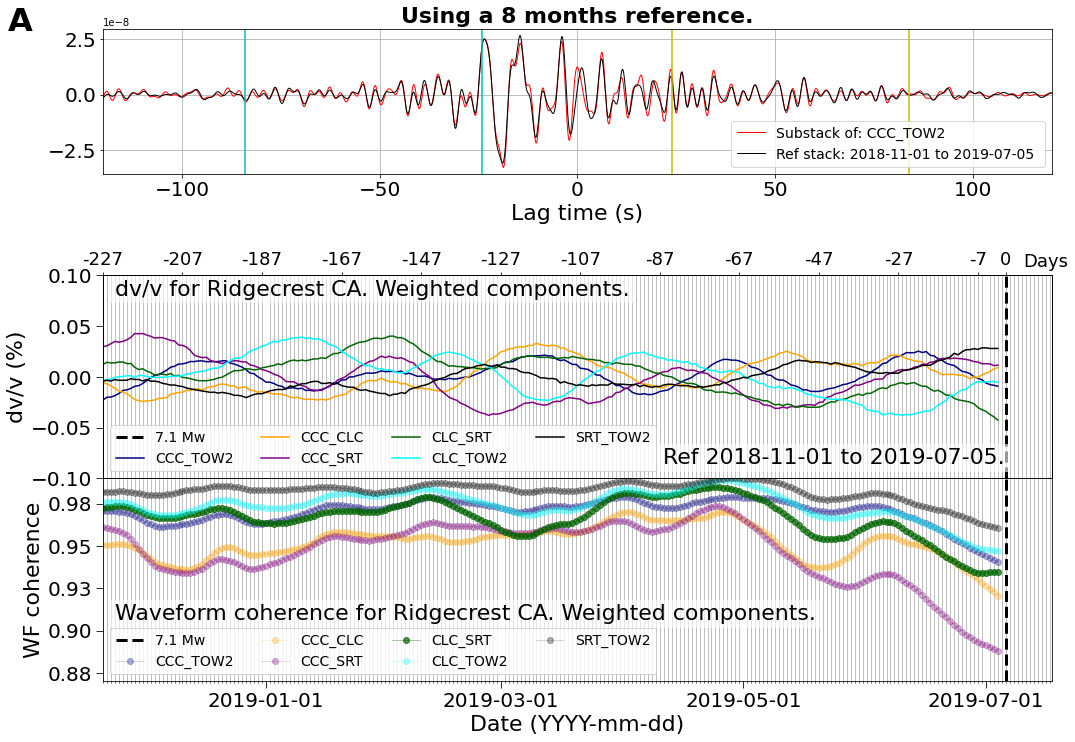

In [3]:
#calculate weighted dv/v average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_results(dvv, cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_dvvs = np.array(dvv)
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between the values of the first group and the values of the second group
    product_sum = np.sum(all_dvvs * (all_cccs**2), axis=0)

    # Calculate the summation of the values of the second group
    all_cccs_sum = np.sum(all_cccs**2, axis=0)

    # Divide the product summation by the summation of the values of the second group
    return product_sum / all_cccs_sum

#calculate weighted waveform cc average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_res(cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between cc^3 and cc^2
    sum_ccc3 = np.sum((all_cccs**3), axis=0)

    # Calculate the summation of the values of the second group
    sum_ccc2 = np.sum((all_cccs**2), axis=0)

    # Divide the product summation by the summation of the values of the second group
    return sum_ccc3 / sum_ccc2

# Define the compos_ for the variables
compos_ = ['ZZ', 'ZE', 'ZN', 'EE', 'EN', 'EZ', 'NN', 'NE', 'NZ']

# Define the number of lists
num_filts = 15

dvv_lists = [[ZZsym_lag1,ZEsym_lag1,ZNsym_lag1,EEsym_lag1,ENsym_lag1,\
            EZsym_lag1,NNsym_lag1,NEsym_lag1,NZsym_lag1]]


cc_c_lists = [[ZZcc_sym1, ZEcc_sym1,ZNcc_sym1,EEcc_sym1,ENcc_sym1,EZcc_sym1,NNcc_sym1,\
             NEcc_sym1,NZcc_sym1]]

########### weighted avg
results = []
for dvv, cc_c in zip(dvv_lists, cc_c_lists):
    results.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg
res_ccc = []
for cc_c in cc_c_lists:
    res_ccc.append(calculate_res(cc_c))
###########

#GAZ_KMRS
#######################2

dvv_lists2 = [[ZZsym_lag2,ZEsym_lag2,ZNsym_lag2,EEsym_lag2,ENsym_lag2,\
            EZsym_lag2,NNsym_lag2,NEsym_lag2,NZsym_lag2]]

cc_c_lists2 = [[ZZcc_sym2, ZEcc_sym2,ZNcc_sym2,EEcc_sym2,ENcc_sym2,EZcc_sym2,NNcc_sym2,\
             NEcc_sym2,NZcc_sym2]]

########### weighted avg2
results2 = []
for dvv, cc_c in zip(dvv_lists2, cc_c_lists2):
    results2.append(calculate_results(dvv, cc_c))
   
    
########### CC waveform avg2
res_ccc2 = []
for cc_c in cc_c_lists2:
    res_ccc2.append(calculate_res(cc_c))
###########
#######################end2


#######################3
dvv_lists3 = [[ZZsym_lag3,ZEsym_lag3,ZNsym_lag3,EEsym_lag3,ENsym_lag3,\
            EZsym_lag3,NNsym_lag3,NEsym_lag3,NZsym_lag3]]


cc_c_lists3 = [[ZZcc_sym3, ZEcc_sym3,ZNcc_sym3,EEcc_sym3,ENcc_sym3,EZcc_sym3,NNcc_sym3,\
             NEcc_sym3,NZcc_sym3]]
########### weighted avg 3
results3 = []
for dvv, cc_c in zip(dvv_lists3, cc_c_lists3):
    results3.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 3
res_ccc3 = []
for cc_c in cc_c_lists3:
    res_ccc3.append(calculate_res(cc_c))
###########
####################### end3

#######################4

dvv_lists4 = [[ZZsym_lag4,ZEsym_lag4,ZNsym_lag4,EEsym_lag4,ENsym_lag4,\
            EZsym_lag4,NNsym_lag4,NEsym_lag4,NZsym_lag4]]

cc_c_lists4 = [[ZZcc_sym4, ZEcc_sym4,ZNcc_sym4,EEcc_sym4,ENcc_sym4,EZcc_sym4,NNcc_sym4,\
             NEcc_sym4,NZcc_sym4]]


########### weighted avg 4
results4 = []
for dvv, cc_c in zip(dvv_lists4, cc_c_lists4):
    results4.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 4
res_ccc4 = []
for cc_c in cc_c_lists4:
    res_ccc4.append(calculate_res(cc_c))
###########
#######################end4


#######################5
dvv_lists5 = [[ZZsym_lag5,ZEsym_lag5,ZNsym_lag5,EEsym_lag5,ENsym_lag5,\
            EZsym_lag5,NNsym_lag5,NEsym_lag5,NZsym_lag5]]


cc_c_lists5 = [[ZZcc_sym5, ZEcc_sym5,ZNcc_sym5,EEcc_sym5,ENcc_sym5,EZcc_sym5,NNcc_sym5,\
             NEcc_sym5,NZcc_sym5]]
########### weighted avg 5
results5 = []
for dvv, cc_c in zip(dvv_lists5, cc_c_lists5):
    results5.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 5
res_ccc5 = []
for cc_c in cc_c_lists5:
    res_ccc5.append(calculate_res(cc_c))
###########
####################### end 5

#######################6
dvv_lists6 = [[ZZsym_lag6,ZEsym_lag6,ZNsym_lag6,EEsym_lag6,ENsym_lag6,\
            EZsym_lag6,NNsym_lag6,NEsym_lag6,NZsym_lag6]]


cc_c_lists6 = [[ZZcc_sym6, ZEcc_sym6,ZNcc_sym6,EEcc_sym6,ENcc_sym6,EZcc_sym6,NNcc_sym6,\
             NEcc_sym6,NZcc_sym6]]
########### weighted avg 6
results6 = []
for dvv, cc_c in zip(dvv_lists6, cc_c_lists6):
    results6.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 6
res_ccc6 = []
for cc_c in cc_c_lists6:
    res_ccc6.append(calculate_res(cc_c))
###########
####################### end 6

#PLOTS#
fig = plt.figure(figsize=(17,12))
gs = fig.add_gridspec(4, 1, height_ratios=[1, 0.7, 1.4,1.4])
#plt.figure(figsize=(15,15))


# reference waveform
ax0 = fig.add_subplot(gs[0, 0])
#ax0 = plt.subplot(613)
ax0.plot(tlag_all,ZZcgf,'r-',linewidth=1)
ax0.plot(tlag_all,ZZrefstack,'k-',linewidth=1)
ax0.set_xlabel('Lag time (s)', size='22', color='black')
ax0.autoscale(enable=True, axis='x', tight=True)
ax0.tick_params(axis='x', labelcolor='k', labelsize='20')
ax0.tick_params(axis='y', labelcolor='k', labelsize='20')
ax0.set_xlim(-120,120)
ax0.grid(True)
ax0.set_title(f"Using a {alt_ref[0]} months reference.", size=22, fontweight='bold')
ax0.legend([f"Substack of: {sta1_}_{sta2_}", f"Ref stack: {ref_start} to {ref_end} ",\
            "analysis window"],loc='lower right', fontsize="14")
ax0.axvline(tlag_all[nwin_indx[0]], c="c")
ax0.axvline(tlag_all[nwin_indx[-1]], c="c")
ax0.axvline(tlag_all[pwin_indx[0]], c="y")
ax0.axvline(tlag_all[pwin_indx[-1]], c="y")
if alt_ref=="8M": fig_n = "A"
if alt_ref=="2M": fig_n = "A"
if alt_ref=="4M": fig_n = "B"
if alt_ref=="6M": fig_n = "C"
ax0.text(-0.1, 1.15, f"{fig_n}", transform=ax0.transAxes, fontsize=32, fontweight='bold', va='top')

# Add a blank 
ax_blank = fig.add_subplot(gs[1, 0])
ax_blank.axis('off')  # Hide

ax1 = fig.add_subplot(gs[2, 0])
ax1.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw") 
ax1.plot(t, results[0], c="navy", label="CCC_TOW2")
ax1.plot(t2, results2[0], c="orange", label="CCC_CLC")
ax1.plot(t3, results3[0], c="purple", label="CCC_SRT")
ax1.plot(t4, results4[0], c="darkgreen",label="CLC_SRT")
ax1.plot(t5, results5[0], c="cyan", label="CLC_TOW2")
ax1.plot(t6, results6[0], c="k", label="SRT_TOW2")
ax1.set_xlim(t[0])
ax1.set_ylim(-0.1,0.1)
ax1.text(0.013, 0.98, f"dv/v for Ridgecrest CA. Weighted components.", transform=ax1.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax1.text(0.59, 0.15, f"Ref {ref_start} to {ref_end}.", transform=ax1.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax1.tick_params(axis='y', labelcolor='k', labelsize='20')
ax1.tick_params(axis='x', labelcolor='w', labelsize='20')
ax1.set_ylabel("dv/v (%)", size=22)
ax1.legend(loc='lower left', ncol=4, fontsize="14")

########### cc WF
ax2 = fig.add_subplot(gs[3, 0], sharex=ax1)
#ax2 = fig.add_subplot(gs[1])
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw") 
ax2.plot(t, res_ccc[0], c="navy", marker="o", lw="0.5", alpha=0.3, label="CCC_TOW2") #CCC_TOW2
ax2.plot(t2, res_ccc2[0], c="orange", marker="o", lw="0.5", alpha=0.3, label="CCC_CLC") #CCC_CLC
ax2.plot(t3, res_ccc3[0], c="purple", marker="o", lw="0.5", alpha=0.3, label="CCC_SRT") #CCC_SRT
ax2.plot(t4, res_ccc4[0], c="darkgreen", marker="o", lw="0.5", alpha=0.7, label="CLC_SRT") #CLC_SRT
ax2.plot(t5, res_ccc5[0], c="cyan", marker="o", lw="0.5", alpha=0.3, label="CLC_TOW2") #CLC_TOW2
ax2.plot(t6, res_ccc6[0], c="k", marker="o", lw="0.5", alpha=0.3, label="SRT_TOW2") #SRT_TOW2
ax2.set_xlim(t[0])
ax2.set_ylim(0.87,0.99) 
if alt_reference == True: ax2.set_ylim(0.83,0.99)
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.set_ylabel("WF coherence", size=22)
ax2.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax2.tick_params(axis='x', labelcolor='k', labelsize='20')
#ax2.set_title(f"Waveform coherence for EAFZ. Weighted components.", size=22)
ax2.text(0.013, 0.38, f"Waveform coherence for Ridgecrest CA. Weighted components.", transform=ax2.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax2.legend(loc='lower left',ncol=4, fontsize="14")
# Define a custom formatter function
def format_func(value, tick_number):
    return f'{value:.2f}'
# Set the y-axis formatter
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
#ax1.text(-0.1, 1.0, 'E', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')

# Creating a second x-axis for countdown
ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())  # Set the same limits as the first x-axis
days_before = (date_range - vertical_line_date).days
ax3_day_numbers = np.where(days_before > 0, days_before, days_before) #-1
# Display the secondary x-axis in intervals of 20 days
ax3.set_xticks(date_range[::20])
ax3.set_xticklabels(ax3_day_numbers[::20], size='18')
ax3.text(0.97, 1.11, 'Days', transform=ax3.transAxes, fontsize=18, va='top')       
ax4 = ax1.twiny()
ax4.set_xlim(ax1.get_xlim())  # Set the same limits as the first x-axis
ax4.set_xticks([vertical_line_date])
ax4.set_xticklabels(['0'], size='18')

for ax in [ax1,ax2]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=7)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')

# Adjust the layout to remove white space between panels 2 and 3
plt.subplots_adjust(hspace=0.4)  # Space between the first panel and the space holder
gs.update(hspace=0.0)  # No space between second and third panels

output_file = os.path.join(output_dir, f"Ridgecrest_ALLst_weight_ref{alt_ref}.pdf")
print(output_file)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()

../RIDGECREST/stretching/CCC_TOW2/20days_stack/interferogram_symlag_CCC_TOW2_MAP.pdf
../RIDGECREST/stretching/CCC_TOW2/20days_stack/Ridgecrest_CCC_TOW2slope_ALLst_weight.pdf


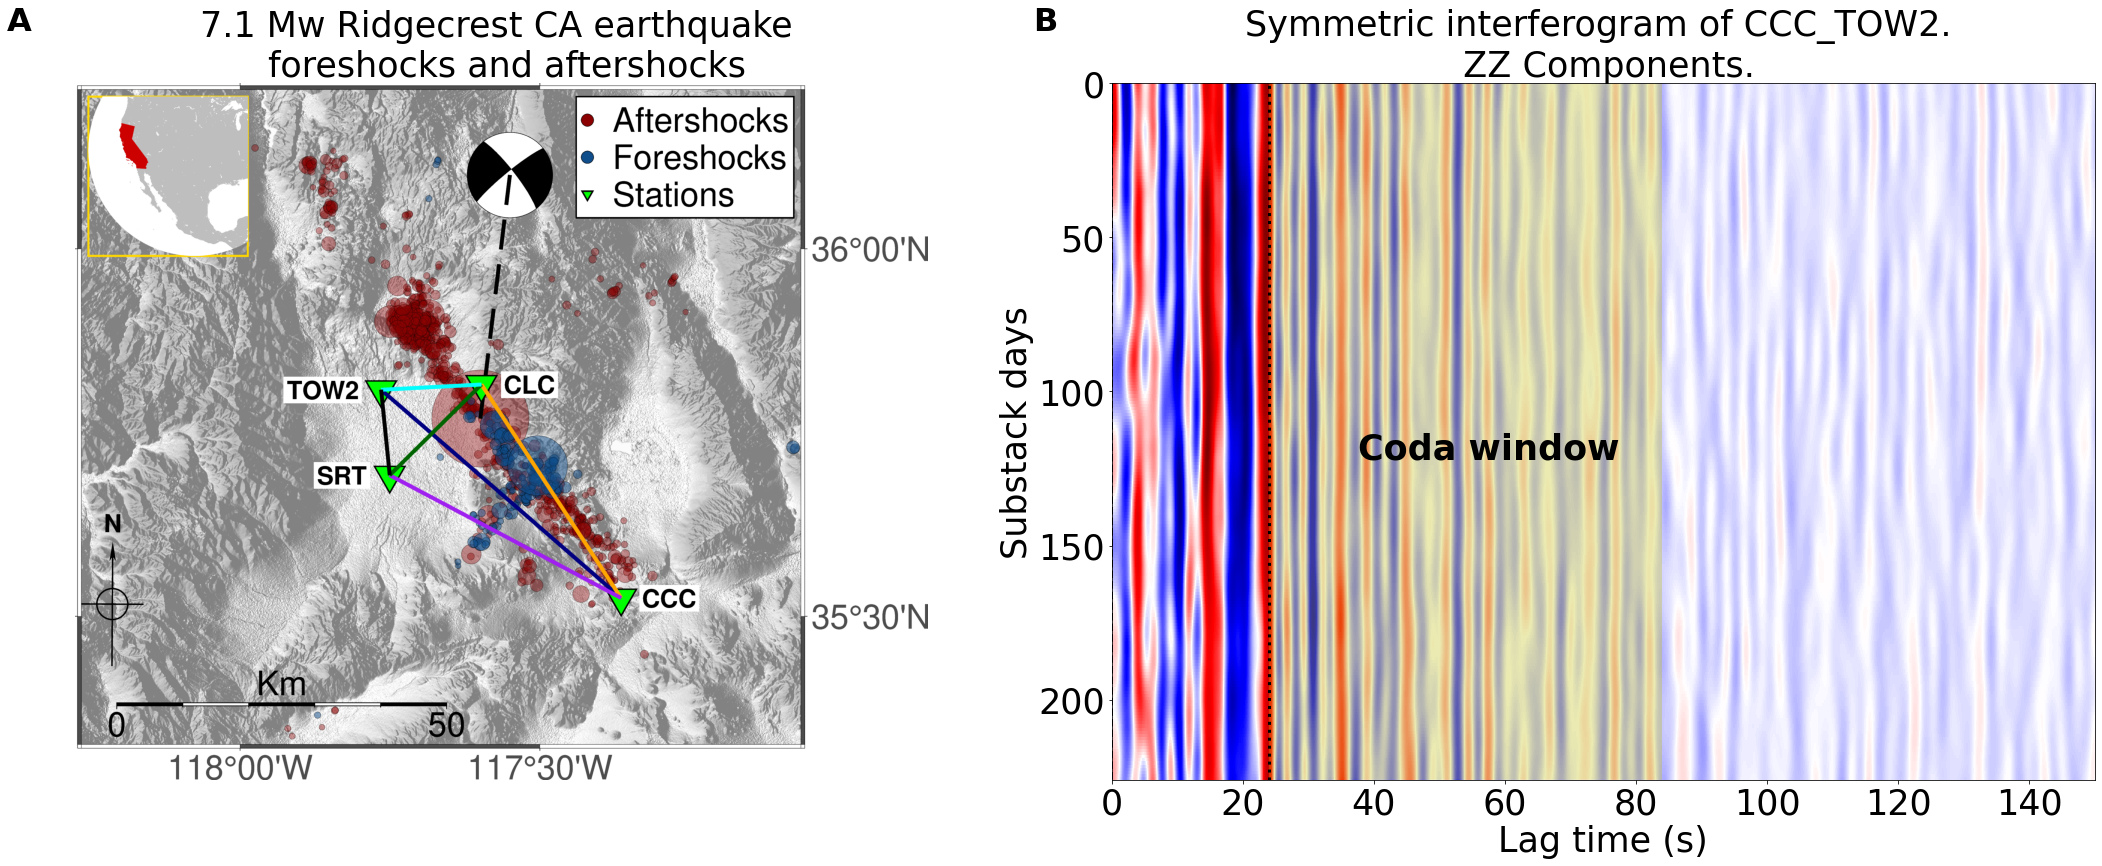

<Figure size 1080x1800 with 0 Axes>

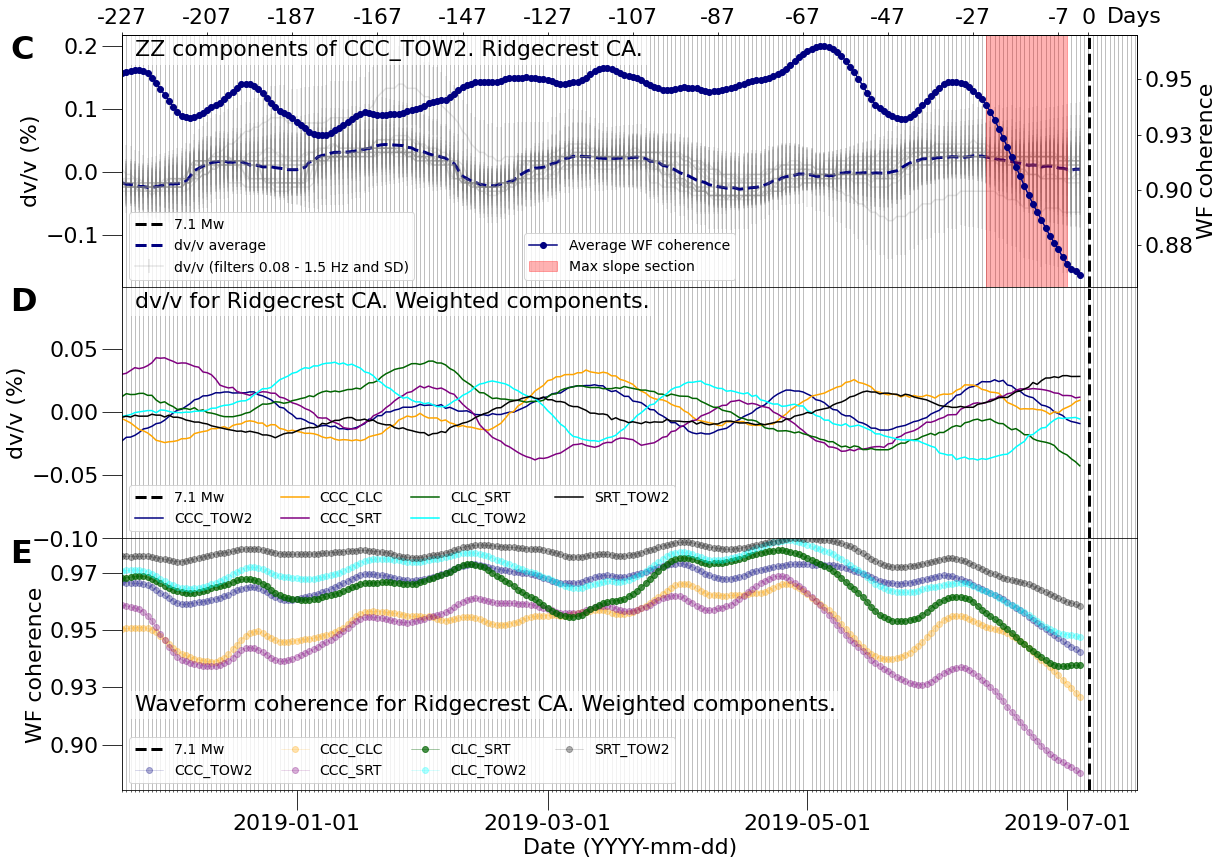

In [4]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FuncFormatter


# Import a PDF image into the fourth subplot
image = plt.imread('FIGS/Ridgecrest_fore_after.png')

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(12) #(12)
fig.set_figwidth(30) #(30)

#####################
ax0 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), rowspan=2)
ax0.imshow(image, aspect='equal')
ax0.set_title("7.1 Mw Ridgecrest CA earthquake \n foreshocks and aftershocks", size=35, color="k")
ax0.set_axis_off()
ax0.text(-0.08, 1.11, 'A', transform=ax0.transAxes, fontsize=32, fontweight='bold', va='top', color="k")
#####################

ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 1), rowspan=2)
# 2D waveform matrix
ax1.matshow(ZZndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax1.set_xlabel("Lag time (s)", size=35, color="k")
ax1.set_ylabel(f"Substack days", size=35) 
ax1.set_title(f"Symmetric interferogram of {sta1_}_{sta2_}. \n ZZ Components.", size=35)
ax1.tick_params(axis='y', labelcolor='black', labelsize='35')
ax1.tick_params(axis='x', labelcolor='black', labelsize='35')
ax1.set_xlim(tlag[0],150)
ax1.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax1.xaxis.set_ticks_position('bottom')
ax1.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax1.text(-0.08, 1.11, 'B', transform=ax1.transAxes, fontsize=32, fontweight='bold', va='top')
ax1.text(0.25, 0.5, 'Coda window', transform=ax1.transAxes, fontsize=35, fontweight='bold', va='top')

output_file = os.path.join(output_dir, f"interferogram_symlag_{sta1_}_{sta2_}_MAP.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')


###################### SLOPE starts #############################
plt.figure(figsize=(15,25))

avg_cc = pd.Series(ZZavg_cc, index=t)
#avg_cc = pd.DataFrame(ZZavg_cc, index=t)

# Calculate the slopes using a moving window of 20 days
window_size = int(n_stack)
if window_size == 10: window_size = 20
slopes = avg_cc.rolling(window_size).apply(lambda x: (x[-1] - x[0]) / (len(x) - 1), raw=True)

# Find the section where the slope starts to decrease until reaching its lowest value
min_slope_start = 0
min_slope_end = 0
min_slope_value = np.inf

for i in range(len(slopes) - window_size + 1):
    current_section = slopes[i:i + window_size]
    current_min_slope = np.min(current_section)
    
    if current_min_slope < min_slope_value:
        min_slope_value = current_min_slope
        min_slope_start = i
        min_slope_end = i + window_size - 1


###########SLOPE ends
   
#****************************************************************
#calculate weighted dv/v average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_results(dvv, cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_dvvs = np.array(dvv)
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between the values of the first group and the values of the second group
    product_sum = np.sum(all_dvvs * (all_cccs**2), axis=0)

    # Calculate the summation of the values of the second group
    all_cccs_sum = np.sum(all_cccs**2, axis=0)

    # Divide the product summation by the summation of the values of the second group
    return product_sum / all_cccs_sum

#calculate weighted waveform cc average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_res(cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between cc^3 and cc^2
    sum_ccc3 = np.sum((all_cccs**3), axis=0)

    # Calculate the summation of the values of the second group
    sum_ccc2 = np.sum((all_cccs**2), axis=0)

    # Divide the product summation by the summation of the values of the second group
    return sum_ccc3 / sum_ccc2

# Define the compos_ for the variables
compos_ = ['ZZ', 'ZE', 'ZN', 'EE', 'EN', 'EZ', 'NN', 'NE', 'NZ']

# Define the number of lists
num_filts = 15

dvv_lists = [[ZZsym_lag1,ZEsym_lag1,ZNsym_lag1,EEsym_lag1,ENsym_lag1,\
            EZsym_lag1,NNsym_lag1,NEsym_lag1,NZsym_lag1]]


cc_c_lists = [[ZZcc_sym1, ZEcc_sym1,ZNcc_sym1,EEcc_sym1,ENcc_sym1,EZcc_sym1,NNcc_sym1,\
             NEcc_sym1,NZcc_sym1]]

########### weighted avg
results = []
for dvv, cc_c in zip(dvv_lists, cc_c_lists):
    results.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg
res_ccc = []
for cc_c in cc_c_lists:
    res_ccc.append(calculate_res(cc_c))
###########

#GAZ_KMRS
#######################2

dvv_lists2 = [[ZZsym_lag2,ZEsym_lag2,ZNsym_lag2,EEsym_lag2,ENsym_lag2,\
            EZsym_lag2,NNsym_lag2,NEsym_lag2,NZsym_lag2]]

cc_c_lists2 = [[ZZcc_sym2, ZEcc_sym2,ZNcc_sym2,EEcc_sym2,ENcc_sym2,EZcc_sym2,NNcc_sym2,\
             NEcc_sym2,NZcc_sym2]]

########### weighted avg2
results2 = []
for dvv, cc_c in zip(dvv_lists2, cc_c_lists2):
    results2.append(calculate_results(dvv, cc_c))
   
    
########### CC waveform avg2
res_ccc2 = []
for cc_c in cc_c_lists2:
    res_ccc2.append(calculate_res(cc_c))
###########
#######################end2


#######################3
dvv_lists3 = [[ZZsym_lag3,ZEsym_lag3,ZNsym_lag3,EEsym_lag3,ENsym_lag3,\
            EZsym_lag3,NNsym_lag3,NEsym_lag3,NZsym_lag3]]


cc_c_lists3 = [[ZZcc_sym3, ZEcc_sym3,ZNcc_sym3,EEcc_sym3,ENcc_sym3,EZcc_sym3,NNcc_sym3,\
             NEcc_sym3,NZcc_sym3]]
########### weighted avg 3
results3 = []
for dvv, cc_c in zip(dvv_lists3, cc_c_lists3):
    results3.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 3
res_ccc3 = []
for cc_c in cc_c_lists3:
    res_ccc3.append(calculate_res(cc_c))
###########
####################### end3

#######################4

dvv_lists4 = [[ZZsym_lag4,ZEsym_lag4,ZNsym_lag4,EEsym_lag4,ENsym_lag4,\
            EZsym_lag4,NNsym_lag4,NEsym_lag4,NZsym_lag4]]

cc_c_lists4 = [[ZZcc_sym4, ZEcc_sym4,ZNcc_sym4,EEcc_sym4,ENcc_sym4,EZcc_sym4,NNcc_sym4,\
             NEcc_sym4,NZcc_sym4]]


########### weighted avg 4
results4 = []
for dvv, cc_c in zip(dvv_lists4, cc_c_lists4):
    results4.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 4
res_ccc4 = []
for cc_c in cc_c_lists4:
    res_ccc4.append(calculate_res(cc_c))
###########
#######################end4


#######################5
dvv_lists5 = [[ZZsym_lag5,ZEsym_lag5,ZNsym_lag5,EEsym_lag5,ENsym_lag5,\
            EZsym_lag5,NNsym_lag5,NEsym_lag5,NZsym_lag5]]


cc_c_lists5 = [[ZZcc_sym5, ZEcc_sym5,ZNcc_sym5,EEcc_sym5,ENcc_sym5,EZcc_sym5,NNcc_sym5,\
             NEcc_sym5,NZcc_sym5]]
########### weighted avg 5
results5 = []
for dvv, cc_c in zip(dvv_lists5, cc_c_lists5):
    results5.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 5
res_ccc5 = []
for cc_c in cc_c_lists5:
    res_ccc5.append(calculate_res(cc_c))
###########
####################### end 5

#######################6
dvv_lists6 = [[ZZsym_lag6,ZEsym_lag6,ZNsym_lag6,EEsym_lag6,ENsym_lag6,\
            EZsym_lag6,NNsym_lag6,NEsym_lag6,NZsym_lag6]]


cc_c_lists6 = [[ZZcc_sym6, ZEcc_sym6,ZNcc_sym6,EEcc_sym6,ENcc_sym6,EZcc_sym6,NNcc_sym6,\
             NEcc_sym6,NZcc_sym6]]
########### weighted avg 6
results6 = []
for dvv, cc_c in zip(dvv_lists6, cc_c_lists6):
    results6.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 6
res_ccc6 = []
for cc_c in cc_c_lists6:
    res_ccc6.append(calculate_res(cc_c))
###########
####################### end 6

#PLOTS#
fig = plt.figure(figsize=(17,12))
gs = GridSpec(3, 1, hspace=0)  

ax2 = fig.add_subplot(gs[0])
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
for i, j in zip(lst_ZZ_symdata, ZZsd_sym_lag):   
    ax2.errorbar(t, i, yerr=j, c="gray", alpha=0.2)
ax2.plot(t, ZZavg_dvv, ls="--", c="navy", linewidth="3")
ax2.text(0.013, 0.98, f"ZZ components of {sta1_}_{sta2_}. Ridgecrest CA.", transform=ax2.transAxes, fontsize=22,\
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
highlight_dates = avg_cc.index[min_slope_start:min_slope_end + 1]
highlight_values = avg_cc[highlight_dates]
ax2.tick_params(axis='y', labelcolor='k', labelsize='22')
#ax2.tick_params(axis='x', labelcolor='k', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
#ax2.set_xlabel('Date [YYYY-mm-dd]', size='22', color='k')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dv/v average", f"dv/v (filters 0.08 - 1.5 Hz and SD)"],loc='lower left', fontsize="14")
ax2.text(-0.11, 1.0, 'C', transform=ax2.transAxes, fontsize=32, fontweight='bold', va='top')

# CC after stretching
ax3 = ax2.twinx()
ax3.plot(t, ZZavg_cc, marker="o", c="navy", label="Average WF coherence")
ax3.axvspan(slopes.index[min_slope_start], slopes.index[min_slope_end],\
            color='red', alpha=0.3, label='Max slope section')
#ax3.axvspan(avg_cc.index[section_start_index], avg_cc.index[section_end_index], color='red', alpha=0.3, label='Max slope section')
ax3.tick_params(axis='y', labelcolor='black', labelsize='22')
#ax3.tick_params(axis='x', labelcolor='w', labelsize='22')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend(loc='lower center', fontsize="14")

# Creating a second x-axis for countdown
ax4 = ax2.twiny()
ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
days_before = (date_range - vertical_line_date).days
ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
# Display the secondary x-axis in intervals of 20 days
ax4.set_xticks(date_range[::20])
ax4.set_xticklabels(ax4_day_numbers[::20], size='22')
ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=22, va='top')      
ax5 = ax2.twiny()
ax5.set_xlim(ax2.get_xlim())  # Set the same limits as the first x-axis
ax5.set_xticks([vertical_line_date])
ax5.set_xticklabels(['0'], size='22')

ax6 = fig.add_subplot(gs[1], sharex=ax2)
ax6.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw") 
ax6.plot(t, results[0], c="navy", label="CCC_TOW2")
ax6.plot(t2, results2[0], c="orange", label="CCC_CLC")
ax6.plot(t3, results3[0], c="purple", label="CCC_SRT")
ax6.plot(t4, results4[0], c="darkgreen",label="CLC_SRT")
ax6.plot(t5, results5[0], c="cyan", label="CLC_TOW2")
ax6.plot(t6, results6[0], c="k", label="SRT_TOW2")
ax6.set_xlim(t[0])
ax6.set_ylim(-0.1,0.099)
ax6.text(0.013, 0.98, f"dv/v for Ridgecrest CA. Weighted components.", transform=ax6.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax6.tick_params(axis='y', labelcolor='k', labelsize='22')
ax6.tick_params(axis='x', labelcolor='w', labelsize='22')
ax6.set_ylabel("dv/v (%)", size=22)
ax6.legend(loc='lower left', ncol=4, fontsize="14")
ax6.text(-0.11, 1.0, 'D', transform=ax6.transAxes, fontsize=32, fontweight='bold', va='top')

########### cc WF
ax7 = fig.add_subplot(gs[2], sharex=ax2)
#ax7 = fig.add_subplot(gs[1])
ax7.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw") 
ax7.plot(t, res_ccc[0], c="navy", marker="o", lw="0.5", alpha=0.3, label="CCC_TOW2") #CCC_TOW2
ax7.plot(t2, res_ccc2[0], c="orange", marker="o", lw="0.5", alpha=0.3, label="CCC_CLC") #CCC_CLC
ax7.plot(t3, res_ccc3[0], c="purple", marker="o", lw="0.5", alpha=0.3, label="CCC_SRT") #CCC_SRT
ax7.plot(t4, res_ccc4[0], c="darkgreen", marker="o", lw="0.5", alpha=0.7, label="CLC_SRT") #CLC_SRT
ax7.plot(t5, res_ccc5[0], c="cyan", marker="o", lw="0.5", alpha=0.3, label="CLC_TOW2") #CLC_TOW2
ax7.plot(t6, res_ccc6[0], c="k", marker="o", lw="0.5", alpha=0.3, label="SRT_TOW2") #SRT_TOW2
ax7.set_xlim(t[0])
ax7.set_ylim(0.88,0.99)
if alt_reference == True: ax7.set_ylim(0.83,0.99) 
ax7.tick_params(axis='y', labelcolor='k', labelsize='22')
ax7.set_ylabel("WF coherence", size=22)
ax7.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax7.tick_params(axis='x', labelcolor='k', labelsize='22')
#ax7.set_title(f"Waveform coherence for EAFZ. Weighted components.", size=22)
ax7.text(0.013, 0.38, f"Waveform coherence for Ridgecrest CA. Weighted components.", transform=ax7.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax7.legend(loc='lower left',ncol=4, fontsize="14")
# Define a custom formatter function
def format_func(value, tick_number):
    return f'{value:.2f}'
# Set the y-axis formatter
ax7.yaxis.set_major_formatter(FuncFormatter(format_func))
ax7.text(-0.11, 1.0, 'E', transform=ax7.transAxes, fontsize=32, fontweight='bold', va='top')

for ax in [ax2,ax6,ax7]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    #fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')


output_file2 = os.path.join(output_dir, f"Ridgecrest_{sta1_}_{sta2_}slope_ALLst_weight.pdf")
print(output_file2)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file2, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()
